In [1]:
from specdal import Collection, Spectrum, read
from matplotlib import pyplot as plt
import numpy as np

# Grouping spectra

In this Notebook, we will utilize specdal's functionality to:
    1. read in a directory of spectral files into a collection
    2. group the spectra by the name
    3. calculate the average spectra for each group
    4. create a new collection of average spectra

## Read a directory of files
You can read an entire directory of spectrum files using the Collection's constructor. By default, the file prefix (filename without the extension) will be used as the name for each spectra.

In [2]:
# read spectrum files in directory
c = Collection(name='Sample data', directory='/home/young/data/specdal/sample/ASD/')

You can see the name of 10 randomly chosen spectra below.

In [3]:
list(np.random.choice([s.name for s in c.spectra], size=10)) # list some names

['ASPI_F_B_SU_20160617_00000',
 'ACSA_T_C_SH_20160617_00002',
 'ACSA_T_B_SU_20160617_00004',
 'ASSY_F_B_SU_20160617_00003',
 'APSI_F_A_SU_20160617_00000',
 'ACSA_T_A_SH_20160617_00003',
 'ASPI_F_B_SU_20160617_00000',
 'ASSY_F_B_SU_20160617_00003',
 'ASSY_F_B_SU_20160617_00006',
 'BAAL_F_A_SU_20160617_00000']

## Grouping

Collection class provides a `groupby` function. This function iterates through the names of the spectra and forms groups in the following way:
    1. split the name into fields using the separator character.
    2. combine indicated fields to define a group.
For example, if a spectrum has name 'A-B-C-D-100', separator is '-', and indices are [0, 3, 4], then
    1. the name is split into fields by '-' => ['A', 'B', 'C', 'D', '100'].
    2. the spectrum belongs in the group defined by combining the 0th, 3rd, and 4th elements => 'A-D-100'

The result of the `groupby` function is an OrderedDict object. The keys are group names and values are collections containing spectra in the group.

In [4]:
groups = c.groupby(separator='_', indices=[0, 1, 2, 3])
group_names = list(groups.keys())
print(group_names)

['ACPA_F_A_SU', 'ACPA_F_B_SU', 'ACSA_T_A_SH', 'ACSA_T_B_SH', 'ACSA_T_B_SU', 'ACSA_T_C_SH', 'ACSA_T_C_SU', 'APSI_F_A_SU', 'ASPI_F_B_SU', 'ASSY_F_A_SU', 'ASSY_F_B_SU', 'BAAL_F_A_SU', 'BRIN_G_A_SU', 'BRIN_G_B_SU']


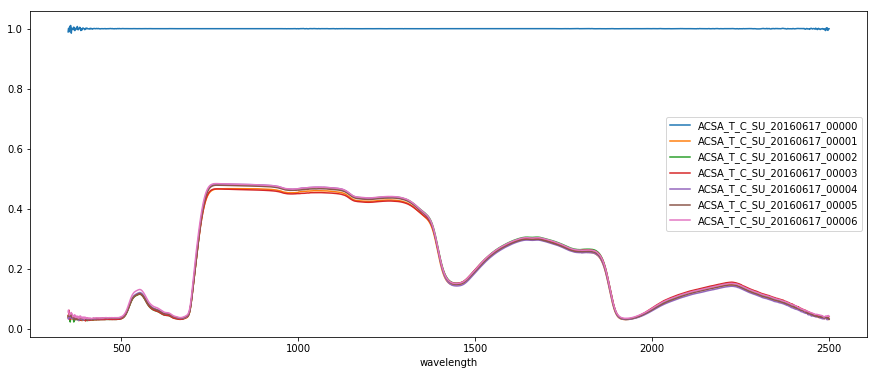

In [5]:
# plotting a single group
groups['ACSA_T_C_SU'].plot(figsize=(15, 6))
plt.show()

We can collect the average spectrum from each group collection.

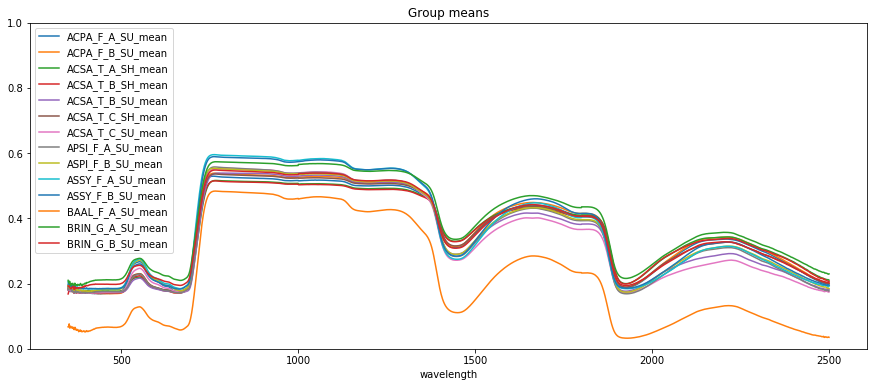

In [6]:
group_means = Collection(name='Group Means')
for group_key, group_collection in groups.items():
    group_means.append(group_collection.mean())
# plot the group means
group_means.plot(title='Group means', figsize=(15, 6), ylim=(0, 1))
plt.show()